In [2]:
# Importing the required Libraries.
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc('font', size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes = True)

In [3]:
# Loading the data
data = pd.read_csv(r"HR_Coma_Sep.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
data.shape

(14999, 10)

# select the left data from the column

In [7]:
data.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [8]:
left = data[data.left == 1]
left.shape

(3571, 10)

# select retained data from the column

In [9]:
retained = data[data.left == 0]
retained.shape

(11428, 10)

# group data on the left base value

In [10]:
d1 = data.groupby('left').mean()
d1

TypeError: Could not convert salessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingmarketingmarketingmarketingmarketingmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmarketingaccountingaccountingITITmanagementsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITITITmarketingaccountingaccountingITITmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITmanagementmanagementmanagementmanagementmanagementmarketingITtechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDmarketingmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesaccountingaccountingaccountinghrhrhrhrtechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicaltechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITRandDRandDRandDRandDRandDRandDmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalestechnicalsupportsupportsupportsupportsupportsupportsupportsupportsupportsupportsupporttechnicaltechnicaltechnicalmanagementITITITITITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementsalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITmanagementmanagementmanagementmanagementmanagementmanagementmarketingsalesaccountingsupporttechnicalmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITITITITITITmarketingaccountingaccountingITITmanagementmarketingmarketingmarketingsalessalessalessalessalessalessalesITproduct_mngproduct_mngproduct_mngproduct_mngITITmanagementmanagementmanagementmanagementmanagementmarketingIT to numeric

# Exploratory data analysis

Try to understand the various factors that led to the employees leaving their jobs

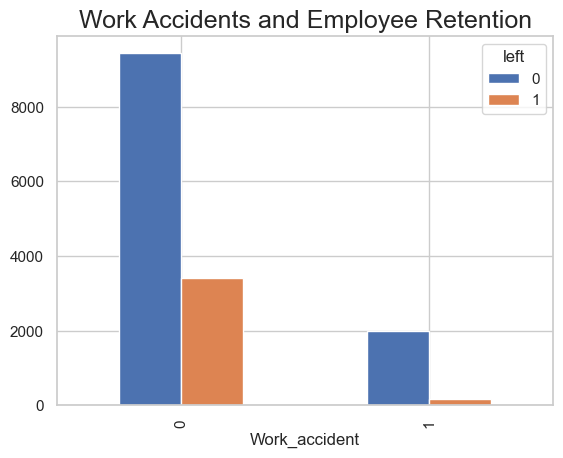

In [11]:
pd.crosstab(data.Work_accident, data.left).plot(kind='bar')
plt.title('Work Accidents and Employee Retention', fontsize = 18);

It can be seen that work accidets is not a major feature that detrmines the employee retention, since the employees who have encountered work accidents have also left their jobs.

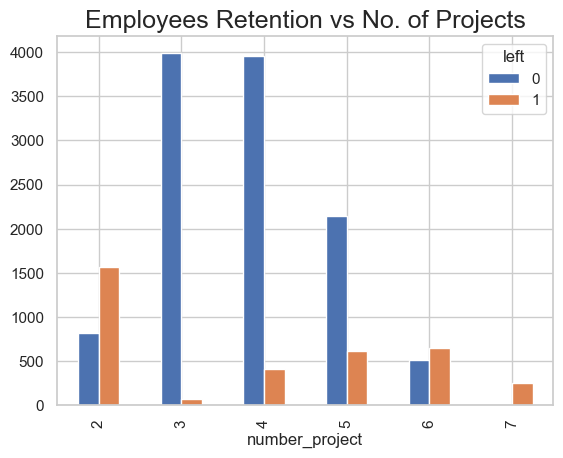

In [12]:
pd.crosstab(data.number_project, data.left).plot(kind='bar')
plt.title('Employees Retention vs No. of Projects', fontsize = 18);

Most of the people who left their jobs have done 2 or less than 2 projects

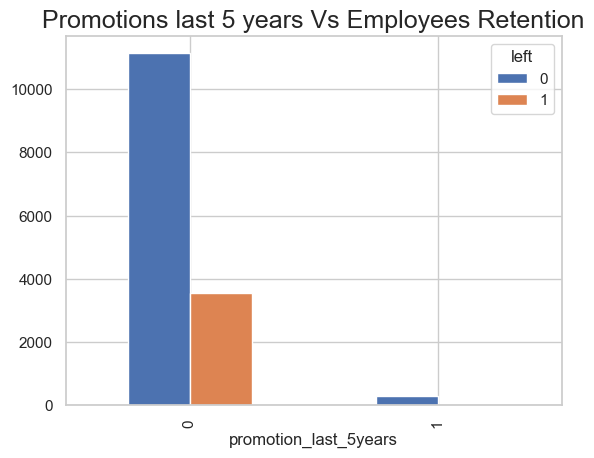

In [14]:
pd.crosstab(data.promotion_last_5years, data.left).plot(kind='bar')
plt.title("Promotions last 5 years Vs Employees Retention", fontsize=18);

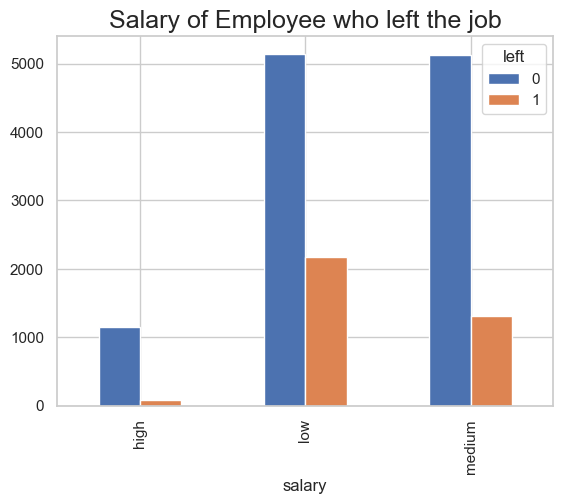

In [15]:
pd.crosstab(data.salary,data.left).plot(kind='bar')
plt.title('Salary of Employee who left the job', fontsize=18);

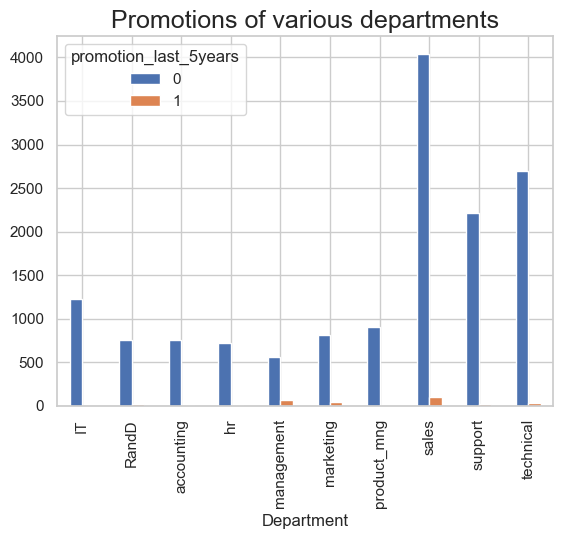

In [16]:
pd.crosstab(data.Department, data.promotion_last_5years).plot(kind='bar')
plt.title("Promotions of various departments", fontsize=18);

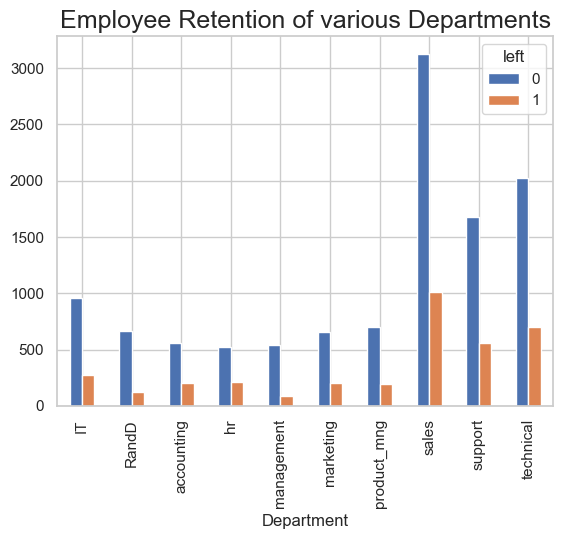

In [18]:
pd.crosstab(data.Department, data.left).plot(kind='bar')
plt.title("Employee Retention of various Departments", fontsize=18);

And It can be clearly seen that most of the employees who left the job were earning low income or medium income and very less proportion of employees are there who left their job and were earning high income. This implies that Salary is a major factor in determining the Employee Retention

# Building a Logistic Regression Model

Select the variables which greatly impact the employees

In [21]:
sel_data = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
sel_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


# Create Dummy Variables of Salary Variable

In [22]:
dummies = pd.get_dummies(sel_data.salary)
dummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


# Concatenate selected varaibles and dummy varaibles

In [23]:
data_dummies = pd.concat([sel_data,dummies], axis= 'columns')
data_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


# Drop Salary varaiable

In [24]:
data_dummies.drop('salary', axis='columns', inplace=True)
data_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


# Assign data to X

In [25]:
x = data_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


# Assign left data to y

In [26]:
y = data.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

# Splitting into test set and trainning set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, train_size = 0.3)

# Logistict Regression Model for prediction

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model

In [30]:
model.fit(X_train, Y_train)

LogisticRegression()

# Prediction

In [32]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Model Score

In [33]:
model.score(X_test, Y_test)

0.7754285714285715

Therefore our Model can work with an accuracy of 77.5%

Hence we can use this model for Job Prediction (i.e we can predict whether an Employee will leave a job or not) with an accuracy of 77.5%